In [144]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn import preprocessing, linear_model

In [145]:
def k_cross_validation_sets(k,x,y):
    cross_validation_x=[]
    cross_validation_y=[]
    size=y.shape[0]
    k_size=int(size/k)
    index=np.random.permutation(range(size))
    for i in range(1,k+1):
        temp_x=x[index[(i-1)*k_size+1:i*k_size],:]
        temp_y=y[index[(i-1)*k_size+1:i*k_size],:]
        cross_validation_x.append(temp_x)
        cross_validation_y.append(temp_y)

    return cross_validation_x, cross_validation_y

In [147]:
def test_sets(k,i):
    return [j-1 for j in range(1,k+1) if i!=j]

In [148]:
def create_sets(training_ratio,x,y):
    size=y.shape[0]
    size_test_set=int(size*(1-training_ratio))
    index=np.random.permutation(range(size))
    test_set=x[index[:size_test_set],:]
    training_set=x[index[size_test_set:size],:]
    y_test=y[index[:size_test_set]]
    y_training=y[index[size_test_set:size]]
    
    return test_set, training_set, y_test, y_training 

In [149]:
def display_tab(name, tab):
    print(name)
    for item in tab:
        print( str(item) )

In [150]:
def display_graphs(tab):
    defaults={'color':'','label':'','xlabel':'','ylabel':'','title':''}
    plt.figure(figsize=(20,10))
    i=1
    for item in tab:
        defaults.update(item)
        plt.subplot(int(np.sqrt(len(tab)))+1,int(np.sqrt(len(tab)))+1,i)
        plt.scatter(defaults['x'],defaults['y'],c=defaults['color'],label=defaults['label'])
        plt.xlabel(defaults['xlabel'])
        plt.ylabel(defaults['ylabel'])
        plt.legend()
        plt.title(defaults['title'])
        i+=1        

In [151]:
def display_graph(tab):
    defaults={'color':'','label':'','xlabel':'','ylabel':'','title':''}
    plt.figure()
    for item in tab:
        defaults.update(item)
        plt.scatter(defaults['x'],defaults['y'],c=defaults['color'],label=defaults['label'])
        plt.xlabel(defaults['xlabel'])
        plt.ylabel(defaults['ylabel'])
        plt.title(defaults['title'])
        plt.legend()
    plt.show()

Q 1.1.1 Programmer la fonction gen_linear(a,b,eps,nbex) qui permet d’engendrer nbex points
(x
i
, yi
) i.i.d. suivant y = ax + b + epsilon, avec :
• epsilon un bruit gaussien de variance eps.
• x tiré selon une loi uniforme sur le segment [−5, 5].
La fonction devra retourner deux matrices X de taille (nbex,1) et Y de taille (nbex,1).

Q 1.1.3 Généraliser votre fonction précédente pour un vecteur d’entrée à d variables, en passant à
la place de a,b une liste de coefficients. Dans la suite, on prendra a = [1, 1, 1] et b = 5


In [152]:
def gen_linear(a,b,eps,nbex):
    #Generate points in d-dimension  Y= a*X +b + epsilon such a follows a -5,5 uniform law, b the offset and epsilon 
    # a gaussian noise with variance=eps
    
    #differentiate cases where a is a tab and where a is a int
    if isinstance(a, int):
        size=1
    else:
        a=np.array(a)
        size=a.shape[0]
        a=a.reshape(-1,1)
    
    x=np.random.uniform(-5,5,(nbex,size))
    epsilon= np.random.normal(0,eps,nbex)
    epsilon=epsilon.reshape(-1,1)
    b=b*np.ones((nbex,1));
    y=x.dot(a) + b +epsilon 
    
    #check the size of the output
    assert(x.shape==(nbex,size) )
    assert(y.shape==(nbex,1))

    return x.reshape(-1,size),y.reshape(-1,1)

Q 1.1.2 Visualiser à l’aide de plt.scatter les points engendrés

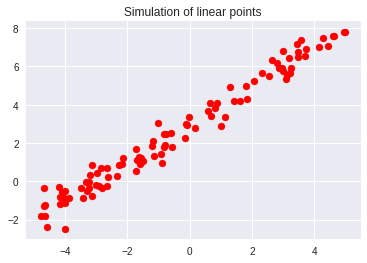

In [153]:
x,y=gen_linear(1,3,0.5,100)
graph_tab=[{'x':x,'y':y,'title':'Simulation of linear points','color':'r'}]
display_graph(graph_tab)

Dans la suite, on prendra a = [1, 1, 1] et b = 5

In [154]:
x,y=gen_linear([1,1,1],5,0.5,100)

Q 1.2.1 Télécharger le fichier housing.csv. Charger le avec le bout de code ci-dessous. Observer
les moyennes et variances de chaque dimension.

In [155]:
def read_file ( fn ):
    with open ( fn ) as f :
        names = f.readline ()
        X = np.array ([[ float ( x ) for x in l.strip ().split(" ")] for l in f .readlines ()])
        return X[:,:-1] ,X[:,-1].reshape(1,-1)

We use Pandas library to extract interessant informations such as mean and standard deviation 

In [156]:
features,price=read_file("housing.csv")
print("size features: , size price :")
print(features.shape,price.shape)

data=pd.read_csv("housing.csv",sep=" ")
data.head()

size features: , size price :
((506, 13), (1, 506))


,crim,zone,indus,chas,nox,room,age,empldist,radiushighway,taxproperty,teacherratio,blackprct,lowerstatus,medianvalue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


We plot the mean of each feature

In [157]:
data.mean()

crim               3.613524
zone              11.363636
indus             11.136779
chas               0.069170
nox                0.554695
room               6.284634
age               68.574901
empldist           3.795043
radiushighway      9.549407
taxproperty      408.237154
teacherratio      18.455534
blackprct        356.674032
lowerstatus       12.653063
medianvalue       22.532806
dtype: float64

We plot the standard deviation of each feature

In [158]:
data.std()

crim               8.601545
zone              23.322453
indus              6.860353
chas               0.253994
nox                0.115878
room               0.702617
age               28.148861
empldist           2.105710
radiushighway      8.707259
taxproperty      168.537116
teacherratio       2.164946
blackprct         91.294864
lowerstatus        7.141062
medianvalue        9.197104
dtype: float64

Q 1.2.2  Pour quelques paires de variables (i, j), représentez en 2D le nuage de points obtenus en
restreignant les données d’entrée à ces variables. Vous pourrez utiliser le bout de code suivant pour
afficher plusieurs graphiques dans une même figure.

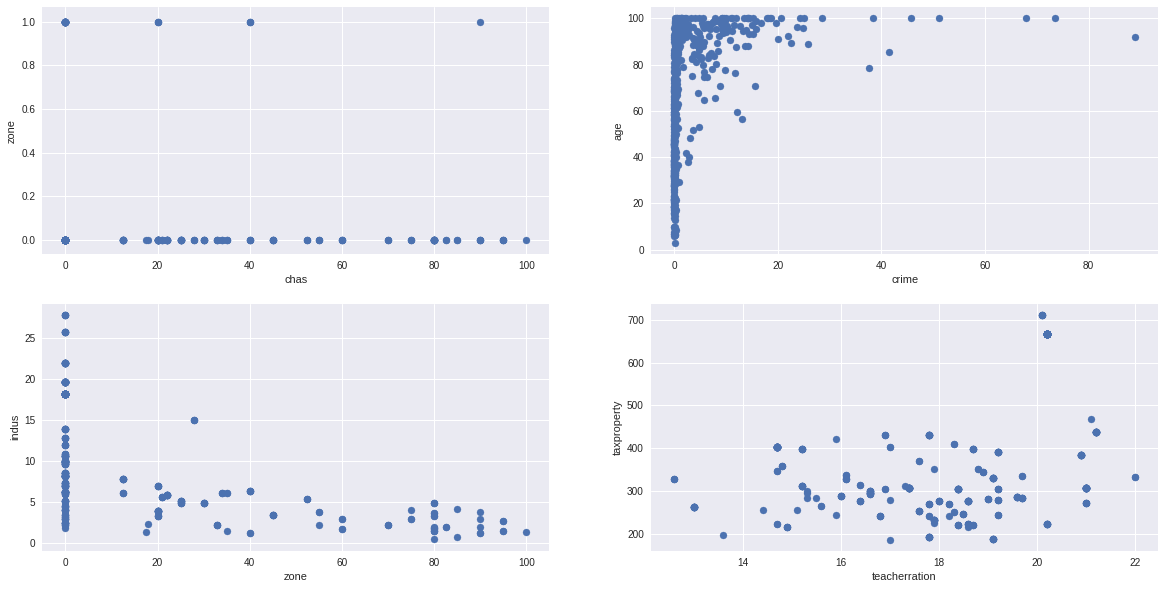

In [159]:

plt.figure(figsize=(20,10))
plt.subplot (2 ,2 ,1) # plt . subplot ( rows , cols , idx )
plt.scatter ( features[:,1] , features[:,3] )
plt.ylabel('zone')
plt.xlabel('chas')

plt.subplot (2 ,2 ,2) # plt . subplot ( rows , cols , idx )
plt.scatter ( features[:,0] , features[:,6] )
plt.ylabel('age')
plt.xlabel('crime')

plt.subplot (2 ,2 ,3) # plt . subplot ( rows , cols , idx )
plt.scatter ( features[:,1] , features[:,2] )
plt.xlabel('zone')
plt.ylabel('indus')

plt.subplot (2 ,2 ,4) # plt . subplot ( rows , cols , idx )
plt.scatter ( features[:,10] , features[:,9] )
plt.xlabel('teacherration')
plt.ylabel('taxproperty')

Q 2.1 (Préambule) Exprimer fw(x) par un produit scalaire, puis Y = fw(X) le résultat de fw
sur toute la base par un produit matriciel. Donner sous forme matricielle le calcul de l’erreur des
moindres carrés pour une base d’apprentissage X, Y . Retrouver la solution analytique de l’estimateur
des moindres carrés.

$fw(X)=<X,w>$

$RSS=1/2n(Y-<X,w>)^{T}(Y-<X,w>)$


$w^{'}=(X^{T}X)^{-1}X^{T}*Y$

Q 2.1.1 Programmer la fonction predict(w,X) qui permet d’obtenir le vecteur résultat de fw(X).

In [160]:
def predict(w,X):
    #we add a colon of ones for the offset
    offset = np.ones(X.shape[0])
    offset=offset.reshape(-1,1)
    X=np.hstack((offset,X))
    #We check the matrix dimensions to be compatible
    assert(X.shape[-1]==w.shape[0])
    
    return X.dot(w)

Q 2.1.2 Donner la fonction mse(yhat,y) qui renvoie l’erreur au sens des moindres carrés entre le
vecteur y et yhat

In [161]:
def mse(yhat,y):
    size= y.shape[0]
    
    assert(y.shape==yhat.shape)
    
    return ((((y-yhat).T).dot(y-yhat))*1./size)[0][0]

Q 2.1.3 Programmer la fonction regress(X,Y) qui renvoie la solution w sous forme d’un vecteur.

In [162]:
def regress(X,Y):
    
    offset = np.ones(X.shape[0])
    offset=offset.reshape(-1,1)
    X=np.hstack((offset,X))
    
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

Q 2.2 Tester sur les données artificielles. Faire varier le nombre de données utilisées et le bruit.
Comment évolue l’erreur des moindres carrés ? L’écart quadratique entre les poids estimés et les vrais
coefficients ? Introduire une ou plusieurs dimensions aléatoires. Que remarquez vous pour les résultats ?
Pour les poids de ces dimensions ? Tracer toutes les courbes correspondantes.

Example in 1D to be able to plot solution

weights :
[ 99.97571993]
[ 0.9842806]


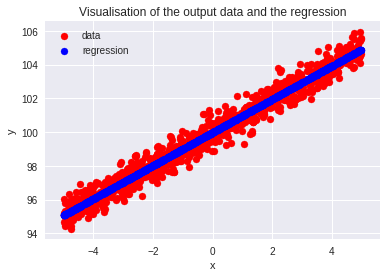

MSE :0.246340089608


In [163]:
x,y =gen_linear(1,100,0.5,1000)
w=regress(x,y)
yhat=predict(w,x)

display_tab("weights :",w)
graph_tab=[{'x':x,'y':y,'label':'data','color':'r','xlabel':'x','ylabel':'y','title':'Visualisation of the output data and the regression'}, {'x':x,'y':yhat,'label':'regression','color':'b'}]
display_graph(graph_tab)

print("MSE :" + str(mse(yhat,y)))

In [164]:
x,y =gen_linear([1,1,1],5,15,1000)
w=regress(x,y)
yhat=predict(w,x)
display_tab("weights :",w)
print("MSE " + str(mse(yhat,y)))


weights :
[ 5.38724779]
[ 0.84071525]
[ 1.02671813]
[ 1.01747386]
MSE 224.195261325


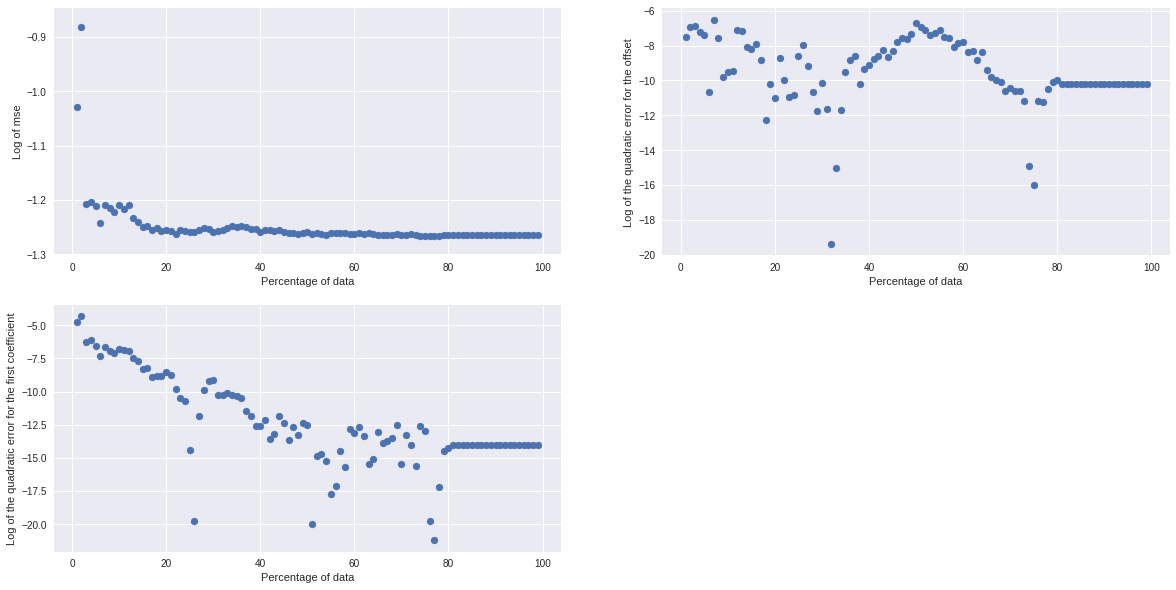

In [165]:
nb_set=[]
tab_mse=[]
tab_offset=[]
tab_coefficient=[]
x,y =gen_linear([1,1,1],5,0.5,1000)
x_test,x_training,y_test,y_training=create_sets(0.8,x,y)
idx=np.random.permutation(range(x_training.shape[0]))

for i in range(1,100):
    x_temp=x_training[idx[:i*10],:]
    y_temp=y_training[idx[:i*10],:]
    w=regress(x_temp,y_temp)
    yhat=predict(w,x_test)
    nb_set.append(i)
    tab_mse.append(mse(yhat,y_test))
    tab_offset.append((5-w[0][0])**2)
    tab_coefficient.append((1-w[1][0])**2)

    
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)

plt.scatter(nb_set,np.log(tab_mse))
plt.xlabel('Percentage of data')
plt.ylabel('Log of mse')


plt.subplot(2,2,2)
plt.scatter(nb_set,np.log(tab_offset))
plt.xlabel('Percentage of data')
plt.ylabel('Log of the quadratic error for the offset')

plt.subplot(2,2,3)
plt.scatter(nb_set,np.log(tab_coefficient))
plt.xlabel('Percentage of data')
plt.ylabel('Log of the quadratic error for the first coefficient')


We can see that the mse converges and seems to decrease as the amount of data gets bigger. And we see that the coefficients converges to 0 in term of quadratic error

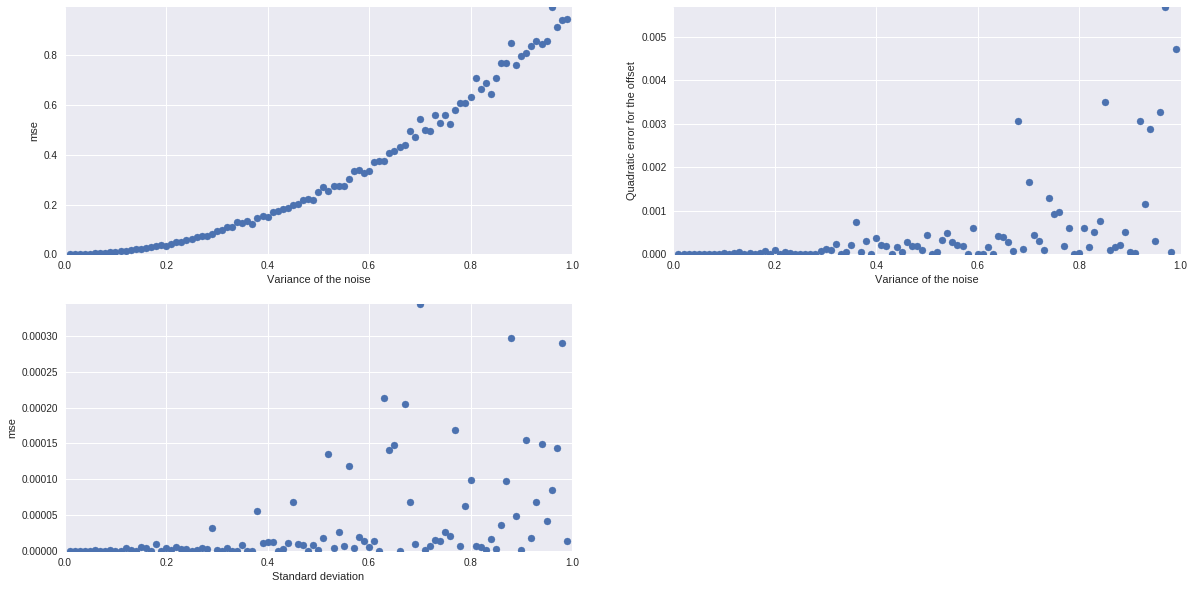

In [166]:

nb_set=[]
tab_mse=[]
tab_offset=[]
tab_coefficient=[]

for i in range(1,100):
    x,y =gen_linear([1,1,1],5,i*0.01,1000)
    w=regress(x,y)
    yhat=predict(w,x)
    nb_set.append(i*0.01)
    tab_mse.append(mse(yhat,y))
    tab_offset.append((5-w[0][0])**2)
    tab_coefficient.append((1-w[1][0])**2)
    
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.scatter(nb_set,tab_mse)
plt.xlabel('Variance of the noise')
plt.ylabel('mse')
plt.axis([0, 1, min(tab_mse), max(tab_mse)])


plt.subplot(2,2,2)
plt.scatter(nb_set,tab_offset)
plt.xlabel('Variance of the noise')
plt.ylabel('Quadratic error for the offset')
plt.axis([0, 1, min(tab_offset), max(tab_offset)])

plt.subplot(2,2,3)
plt.scatter(nb_set,tab_coefficient)
plt.xlabel('Variance of the noise')
plt.ylabel('Quadratic error for the first coefficient')
plt.axis([0, 1, min(tab_coefficient), max(tab_coefficient)])
plt.xlabel('Standard deviation')
plt.ylabel('mse')

We see that when the noise increases, the mse tends to increase in some quadratic way. What's more, the quadratic errors of the officients tends to increase.

We have to add random dimensions to the features and see how the weights of thoses. Lets add 2
random feature which follow the uniform law with parameters [-5,5] so we don't have to normalize data because all the features are distributed this way

In [167]:
x,y =gen_linear([1,1,1],5,0.5,1000)
random_features=np.random.uniform(-5,5,(1000,2))
X=np.hstack((x,random_features))
w=regress(x,y)
W=regress(X,y)
display_tab("weights before adding random feature :",w)
display_tab("weights after adding random feature:", W)
yhat=predict(w,x)
YHAT=predict(W,X)

print("MSE " + str(mse(yhat,y)))
print("MSE " + str(mse(YHAT,y)))



weights before adding random feature :
[ 5.01744478]
[ 1.00675988]
[ 0.98865439]
[ 1.00474651]
weights after adding random feature:
[ 5.01757214]
[ 1.00696724]
[ 0.98881202]
[ 1.00465833]
[-0.00408179]
[ 0.00770578]
MSE 0.24454663646
MSE 0.243929005111


We can observe that the coefficients of thoses random features are way lower than the others, that's because they don't explain y

Q 2.3 Tester sur les données réelles.
Q 2.3.1 Pouvez-vous donner une interprétation aux valeurs des poids des différentes variables ?

In [168]:

w=regress(features,price.T)
display_tab("weights :",w)
yhat=predict(w,features)
print("MSE " + str(mse(yhat,price.T)))

#we save the fifth coefficient for the next question
w_saved=w[5]




weights :
[ 36.45948839]
[-0.10801136]
[ 0.04642046]
[ 0.02055863]
[ 2.68673382]
[-17.76661123]
[ 3.80986521]
[ 0.00069222]
[-1.47556685]
[ 0.30604948]
[-0.01233459]
[-0.95274723]
[ 0.00931168]
[-0.52475838]
MSE 21.8948311817


The weights of features describe how they can explain the price.

Q 2.3.2 Multiplier par 10 une des dimensions. Que se passe-t-il pour l’erreur ? Pour le poids associé ?
Cela modifie-t-il votre interprétation de la question précédente ? Quel pré-traitement sur les données
permet de donner aux poids des variables une interprétation plus fiable ? Tracer la courbe qui donne
l’erreur des moindres carrés en fonction du nombre de données utilisées, en appliquant ce pré-traitement.



In [169]:
features1=np.copy(features)
features1[:,4]=features1[:,4]*10
print("Mean of features after feature multiplication",np.mean(features1[:,4]))
print("Mean of features before feature multiplication",np.mean(features[:,4]))
w=regress(features1,price.T)
print("Value of the weight after feature multiplication",w[5])
print("Value of the weight before feature multiplication",w_saved)
yhat=predict(w,features1)
print("MSE " + str(mse(yhat,price.T)))


('Mean of features after feature multiplication', 5.5469505928853753)
('Mean of features before feature multiplication', 0.55469505928853757)
('Value of the weight after feature multiplication', array([-1.77666112]))
('Value of the weight before feature multiplication', array([-17.76661123]))
MSE 21.8948311817


We have mutiplied the fifth features (features[:,4]) by 10 term by term. We notice that when have multiplied this features by 10, the weight of this feature has been divided by 10 and the mse hasn't changed at all. Yes because we said that the absolute value of the weights tends to explain in which measure one feature explain the price.Such considerations are correct if the input data are comparable. We have to normalize the input data.


In [170]:
features_normalized=preprocessing.scale(features)
w=regress(features_normalized,price.T)
display_tab("w",w)
yhat=predict(w,features_normalized)
print("MSE " + str(mse(yhat,price.T)))


w
[ 22.53280632]
[-0.92814606]
[ 1.08156863]
[ 0.1409]
[ 0.68173972]
[-2.05671827]
[ 2.67423017]
[ 0.01946607]
[-3.10404426]
[ 2.66221764]
[-2.07678168]
[-2.06060666]
[ 0.84926842]
[-3.74362713]
MSE 21.8948311817


(405, 1)


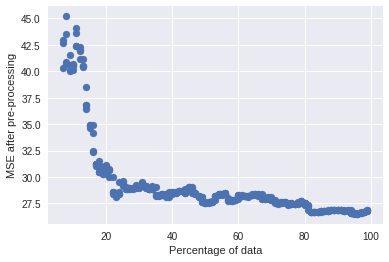

In [171]:
nb_set=[]
tab_mse=[]
size=price.T.shape[0]
x_test,x_training,y_test,y_training=create_sets(0.8,features_normalized,price.T)
idx=np.random.permutation(range(y_training.shape[0]))
print(y_training.shape)
for i in range(30,y_training.shape[0]):
    x_temp=x_training[idx[:i],:]
    y_temp=y_training[idx[:i],:]
    w=regress(x_temp,y_temp)
    yhat=predict(w,x_test)
    nb_set.append(i*100/y_training.shape[0])
    tab_mse.append(mse(yhat,y_test))


plt.scatter(nb_set,tab_mse)
plt.xlabel('Percentage of data')
plt.ylabel('MSE after pre-processing')


Q 2.3.3 Avez-vous confiance en l’estimation de l’erreur des moindres carrés ? Partager les données
initiales en deux sous-ensembles, un sous-ensemble d’apprentissage et un de test. Pour un centrage et
une normalisation donnée du sous-ensemble d’apprentissage, comment faut-il traiter les données de test
pour évaluer correctement le modèle linéaire sur celles-ci ? Comparer l’erreur des moindres carrés sur les
deux sous-ensembles pour différentes tailles des sous-ensembles et tracer les courbes correspondantes

We have to normalize the test data with the mean and standard deviation of the training features because if we normalize with the test set, it's like we have observed all the data before fitting the model and we lose the stochastic character. We observe that in most cases the test error is higher than then training error

[]

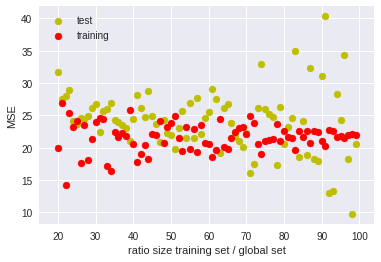

In [172]:

tab_size=[]
tab_mse_training=[]
tab_mse_test=[]
standard_scaler=preprocessing.StandardScaler()

for ratio in range(20,100):
    tab_size.append(ratio)
    ratio=ratio/100.
    x_test,x_training,y_test,y_training=create_sets(ratio,features_normalized,price.T)
    #We save parameters of the learning set and the transform the test_set
    standard_scaler.fit(x_training)
    x_training=standard_scaler.transform(x_training)
    x_test=standard_scaler.transform(x_test)
    
    #we perform w estimation
    w=regress(x_training,y_training)
    yhat=predict(w,x_training)
    tab_mse_training.append(mse(yhat,y_training))
    yhat2=predict(w,x_test)
    tab_mse_test.append(mse(yhat2,y_test))


plt.figure()
    
plt.scatter(tab_size,tab_mse_test,c='y',label="test")
plt.xlabel('ratio size training set / global set')
plt.ylabel('MSE')

plt.scatter(tab_size,tab_mse_training,c='r',label="training")

plt.legend()

plt.plot()




We can observe that the mse of the test set is often above the the traininf mse so we shouldn't trust the training mse especially when the ratio of training size divided by global size is low. 

Q 3.1 Quel problème peut arriver dans la résolution analytique de la régression linéaire ? Dans
quel cas ? Cela arrive-t-il souvent ? Afin de pallier ce problème, la ridge régression introduit un terme
supplémentaire dans la fonction de coût en y ajoutant λkwk
2
, la norme 2 au carré du vecteur de
paramètres. Ce terme peut également s’interpréter comme une pénalisation sur les poids du vecteur
solution trouvé - une régularisation. Exprimer de nouveau la solution analytique sous forme matricielle.
Programmer la fonction ridge_regress(X,Y,lmb).

It's possible to have overfitting when doing linear regression. It happens often when the model has to many degrees of freedom or when the features are highly corralated.  So we have to shrink w by limited its norm.
The problem can be written this way : 
$w^{ridge}=argmin( 1/2n(Y-<X,w>)^{T}(Y-<X,w>)  +  λ|w|^{2})$
If the previous RSS is convex, this problem is strongly convex and admits an unique solution.

We have $ W^
{ridge} = (X
^{T}X + λI)^{
−1}X
^{T}y$  

In [173]:
def ridge_regress(X,Y,lmd):
    offset = np.ones(X.shape[0])
    offset=offset.reshape(-1,1)
    X=np.hstack((offset,X))
    return np.linalg.inv(X.T.dot(X)+lmd*np.eye(X.shape[1],X.shape[1])).dot(X.T).dot(Y)


Q 3.2 Expérimenter sur les données artificielles : tracer les différentes erreurs en fonction du paramètre
λ. On prendra λ sur une grille logarithmique en veillant à couvrir les régimes intéressants.

[]

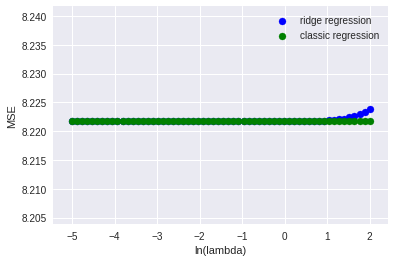

In [188]:

mse_ridge=[]
tab_lambda=[]
mse_regression=[]

standard_scaler=preprocessing.StandardScaler()
k=10
x,y =gen_linear([1,1,1],5,3,1000)
lambdas=np.linspace(-2,5,60)
x_tests,y_tests=k_cross_validation_sets(k,x,y)

for lmd in lambdas:
    tab_lambda.append(-lmd)
    temp_mse_ridge=0
    temp_mse=0
    
    for i in range(1,k+1):
        x_training=np.vstack((x_tests[j] for j in test_sets(k,i)))
        y_training=np.vstack((y_tests[j] for j in test_sets(k,i)))  
        x_test=x_tests[i-1]
        y_test=y_tests[i-1]
       
        
        #Normalisation
        standard_scaler.fit(x_training)
        x_training=standard_scaler.transform(x_training)

        x_test=standard_scaler.transform(x_test)
       
        #we perform w estimation with ridge

        w=ridge_regress(x_training,y_training,np.exp(-lmd))

        #we perform w estimation with classic regression
        
        wthird=regress(x_training,y_training)
        
        
        #we perform mse estimation 
        
        yhat2=predict(w,x_test)
        temp_mse_ridge+=mse(yhat2,y_test)
        
        yhat4=predict(wthird,x_test)
        temp_mse+=mse(yhat4,y_test)
        
    mse_ridge.append(temp_mse_ridge/(k+1))
    mse_regression.append(temp_mse/(k+1))

    
    
plt.figure()

   
plt.scatter(tab_lambda,mse_ridge,c='b',label="ridge regression")
plt.scatter(tab_lambda,mse_regression,c='g',label="classic regression")



plt.xlabel('ln(lambda)')
plt.ylabel('MSE')
plt.legend()

plt.plot()


Q 3.3 Expérimenter de manière analogue sur les données réelles. Les résultats sont-ils différents des
questions précédentes ?

[]

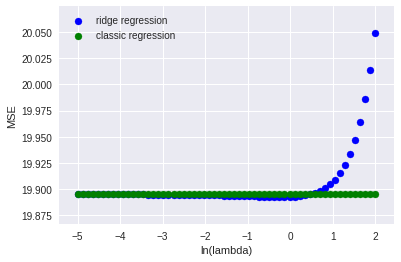

In [190]:

mse_ridge=[]
tab_lambda=[]
mse_regression=[]

standard_scaler=preprocessing.StandardScaler()
k=5
x,y =features, price.T
lambdas=np.linspace(-2,5,60)
x_tests,y_tests=k_cross_validation_sets(k,x,y)

for lmd in lambdas:
    tab_lambda.append(-lmd)
    temp_mse_ridge=0
    temp_mse=0
    
    for i in range(1,k+1):
        x_training=np.vstack((x_tests[j] for j in test_sets(k,i)))
        y_training=np.vstack((y_tests[j] for j in test_sets(k,i)))  
        x_test=x_tests[i-1]
        y_test=y_tests[i-1]
       
        
        #Normalisation
        standard_scaler.fit(x_training)
        x_training=standard_scaler.transform(x_training)
        x_test=standard_scaler.transform(x_test)
       
        #we perform w estimation with ridge

        w=ridge_regress(x_training,y_training,np.exp(-lmd))

        #we perform w estimation with classic regression
        
        wthird=regress(x_training,y_training)
        
        
        #we perform mse estimation 
        
        yhat2=predict(w,x_test)
        temp_mse_ridge+=mse(yhat2,y_test)
        
        yhat4=predict(wthird,x_test)
        temp_mse+=mse(yhat4,y_test)
        
    mse_ridge.append(temp_mse_ridge/(k+1))
    mse_regression.append(temp_mse/(k+1))

    
    
plt.figure()

   
plt.scatter(tab_lambda,mse_ridge,c='b',label="ridge regression")
plt.scatter(tab_lambda,mse_regression,c='g',label="classic regression")



plt.xlabel('ln(lambda)')
plt.ylabel('MSE')
plt.legend()

plt.plot()


Yes for some values of lambda, the lasso outperforms the ridge because some of the features are more correlated

Le Lasso remplace la norme l2 au carré par une norme l1. On résout dans ce cas le problème suivant :
$(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
$
L’algorithme est implémenté dans scikit-learn dans le module sklearn.linear_model.Lasso. Plus de
détails sur l’implémentation sont disponibles dans la documentation de scikit-learn.
On travaille dans cette partie sur les données réelles

Q 4.1 Tracer, sur la même figure, l’évolution de chaque composante du vecteur w en fonction de λ.
Faites de même pour la ridge régression. Que remarquez vous ?

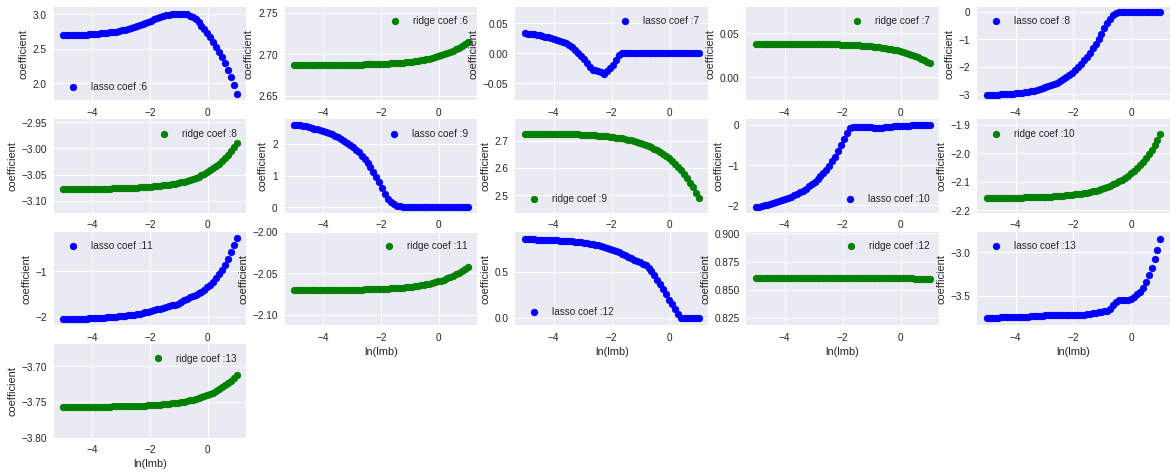

In [176]:

coeffs_ridge=np.zeros([60,14])
coeffs_lasso=np.zeros([60,14])

tab_lambda=[]
standard_scaler=preprocessing.StandardScaler()
k=5
x,y =features,price.T
lambdas=np.linspace(-1,5,60)
x_tests,y_tests=k_cross_validation_sets(k,x,y)

nb=0
for lmd in lambdas:
    tab_lambda.append(-lmd)
    coeffs_ridge_temp=np.zeros([14,1])
    coeffs_lasso_temp=np.zeros([14,1])

    for i in range(1,k+1):
        x_training=np.vstack((x_tests[j] for j in test_sets(k,i)))
        y_training=np.vstack((y_tests[j] for j in test_sets(k,i)))  
        x_test=x_tests[i-1]
        y_test=y_tests[i-1]
        
        #Normalisation
        standard_scaler.fit(x_training)
        x_training=standard_scaler.transform(x_training)
        standard_scaler.fit(x_test)
        x_test=standard_scaler.transform(x_test)
        
        #we perform w estimation with ridge
        w=ridge_regress(x_training,y_training,np.exp(-lmd))

       #we perform w estimation with Lasso
        clf = linear_model.Lasso(alpha=np.exp(-lmd),normalize=False,fit_intercept=True,copy_X=True)
        clf.fit(x_training,y_training)
        wprime=np.array(clf.coef_)
        wprime=np.hstack((clf.intercept_,wprime))
        wprime=wprime.reshape(-1,1)
        
        coeffs_lasso_temp+=wprime
        coeffs_ridge_temp+=w

    coeffs_lasso[nb]=coeffs_lasso_temp[:,0]/k
    coeffs_ridge[nb]= coeffs_ridge_temp[:,0]/k
    nb+=1



graph_tab=[]
for i in range(6, 14):
    dict_set1={'x':tab_lambda,'y':coeffs_lasso[:,i],'label':'lasso coef :'+str(i),'color':'b','xlabel':'ln(lmb)', 'ylabel':'coefficient'}
    dict_set2={'x':tab_lambda,'y':coeffs_ridge[:,i],'label':'ridge coef :'+str(i),'color':'g'}
    graph_tab.append(dict_set1)
    graph_tab.append(dict_set2)

display_graphs(graph_tab)
   
# plt.scatter(tab_lambda,mse_ridge,c='b',label="ridge regression")
# plt.scatter(tab_lambda,mse_regression,c='g',label="classic regression")



# plt.xlabel('ln(lambda)')
# plt.ylabel('MSE')
# plt.legend()

# plt.plot()


We observe that the lasso regression performs feature selection, indeed some coefficients like the tenth shrink fastly towards 0 while the ridge coefficients converge smoothly. The Lasso regression solution are non linear in yi . The norm $||_{1}$ will cause some weights to be exactly zero when λ dicreases.

Q 4.2 Comparer la performance du Lasso et celle de la ridge régression sur les données de test.

[]

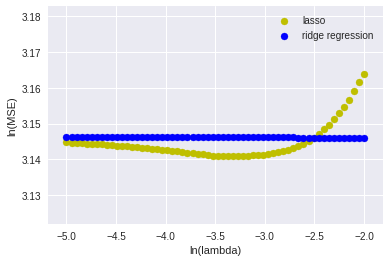

In [191]:
 
mse_lasso=[]
mse_ridge=[]
tab_lambda=[]

standard_scaler=preprocessing.StandardScaler()

k=10
x,y =features,price.T
lambdas=np.linspace(2,5,60)
x_tests,y_tests=k_cross_validation_sets(k,x,y)

for lmd in lambdas:
    tab_lambda.append(-lmd)
    temp_mse_ridge=0
    temp_mse_ridge_sklearn=0
    temp_mse_lasso=0
    temp_mse=0
    temp_mse_sklearn=0

    for i in range(1,k+1):
        x_training=np.vstack((x_tests[j] for j in test_sets(k,i)))
        y_training=np.vstack((y_tests[j] for j in test_sets(k,i)))  
        x_test=x_tests[i-1]
        y_test=y_tests[i-1]
       
        
        #Normalisation
        standard_scaler.fit(x_training)
        x_training=standard_scaler.transform(x_training)
        standard_scaler.fit(x_test)
        x_test=standard_scaler.transform(x_test)
        
        #we perform w estimation with Lasso
        clf = linear_model.Lasso(alpha=np.exp(-lmd),normalize=False,fit_intercept=True,copy_X=True)
        clf.fit(x_training,y_training)
        wprime=np.array(clf.coef_)
        wprime=np.hstack((clf.intercept_,wprime))
        wprime=wprime.reshape(-1,1)
        
        #we perform w estimation with ridge

        w=ridge_regress(x_training,y_training,np.exp(-lmd))

        #we perform w estimation with classic regression
        wthird=regress(x_training,y_training)
        

        #we perform mse estimation 
        yhat=predict(wprime,x_test)
        temp_mse_lasso+=mse(yhat,y_test)
        
        yhat2=predict(w,x_test)
        temp_mse_ridge+=mse(yhat2,y_test)
        
    mse_lasso.append(np.log(temp_mse_lasso/(k+1)))
    mse_ridge.append(np.log(temp_mse_ridge/(k+1)))


plt.figure()

   
plt.scatter(tab_lambda,mse_lasso,c='y',label="lasso")
plt.scatter(tab_lambda,mse_ridge,c='b',label="ridge regression")
plt.xlabel('ln(lambda)')
plt.ylabel('ln(MSE)')
plt.legend()
plt.plot()
    

Q 5.1 Télécharger le fichier inpainting.py. Il contient quelques fonctions utiles pour charger une
image, extraire un patch, bruiter un patch, transformer un patch en vecteur et inversement, afficher
un patch et construire un dictionnaire de patchs. Implémenter une fonction denoise(patch,dic) qui
permet de débruiter le patch donné en entrée en fonction du dictionnaire dic. Faites varier le coefficient
de régularisation. Que remarquez vous pour les valeurs faibles et grandes de λ ?

In [203]:
import numpy as np
import sklearn.linear_model as lm
import pdb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import rgb_to_hsv,hsv_to_rgb
from time import sleep

### Dimension du patch x-h:x+h,y-h:y+h
H = 20
### Valeur fictive pour les pixels absents
DEAD = -100
### Fichier image
IMG_FILE = "mer-small.jpg"

def build_dic(im,step=H):
    """ construction du dictionnaire : tous les patchs sans pixels morts en parcourant step by step l'image """
    res=[]
    step = step
    for i in range(0,im.shape[0],step):
        for j in range(0,im.shape[1],step):
            if inside(i,j,im,step) and np.sum(get_patch(i,j,im,step)[:,:,0]<=DEAD)==0:
                res.append(patch2X(get_patch(i,j,im)))
    return np.array(res).T

def patch2X(patch):
    """ transformation d'un patch en vecteur """
    return patch.reshape(-1)

def X2patch(X,h=H):
    """ transformation d'un vecteur en patch image"""
    return X.reshape(2*h+1,2*h+1,3)

def patch2Ic(patch):
    output=np.ones(patch.shape[0])
    for i in range(0,patch.shape[0]-1):
        if patch[i]==-100:
            output[i]=0
    return output

def Ic2features(Ic,patch):
    return np.hstack((patch[i] for i in range(0,patch.shape[0]-1) if Ic[i]!=0))

def Ic2input(Ic,patch):
    return np.hstack((patch[i] for i in range(0,patch.shape[0]-1) if Ic[i]==0))

def out2img(output,patch,Ic):
    patch_temp=patch.copy()
    list_output=output.tolist()
    for i in range(0,patch.shape[0]-1):
        if(Ic[i]==0):
            patch_temp[i]=list_output.pop(0)
    return X2patch(patch_temp)
    
    

def inside(i,j,im,h=H):
    """ test si un patch est valide dans l'image """
    return i-h >=0 and j-h >=0 and i+h+1<=im.shape[0] and j+h+1<=im.shape[1]

def get_patch(i,j,im,h=H):
    """ retourne un patch centre en i,j """
    return im[(i-h):(i+h+1),(j-h):(j+h+1)]

def remove_patch(i,j,im,h=H):
    """ Supprime le patch de l'image """
    imn= im.copy()
    imn[(i-h):(i+h+1),(j-h):(j+h+1)]=DEAD
    return imn,get_patch(i,j,im,h)

def add_patch(i,j,im,patch,h=H):
    imn=im.copy()
    imn[(i-h):(i+h+1),(j-h):(j+h+1)]=patch
    return imn

def noise_patch(patch,prc=0.1):
    """ Supprime des pixels aleatoirement """
    npatch = patch.copy().reshape(-1,3)
    height,width = patch.shape[:2]
    nb =int(prc*height*width)
    npatch[np.random.randint(0,height*width,nb),:]=DEAD
    return npatch.reshape(height,width,3)

def show(im,fig= None):
    """ affiche une image ou un patch """
    im = im.copy()
    if len(im.shape)==1 or im.shape[1]==1:
        im = X2patch(im)
    im[im<=DEAD]=-0.5
    if fig is None:
        plt.figure()
        fig = plt.imshow(hsv_to_rgb(im+0.5))
    fig.set_data(hsv_to_rgb(im+0.5))
    plt.draw()
    plt.pause(0.001)
    return fig

def read_img(img):
    """ lit un fichier image """
    im = mpimg.imread(img)
    print(im.shape)
    
    if im.max()>200:
        im = im/255.
    return rgb_to_hsv(im)-0.5

def denoise(patch,img,alpha):
    
    Ic=patch2Ic(patch)
    dic=build_dic(img)
    
    y=Ic2features(Ic,patch)
    x=np.zeros((y.shape[0],dic.shape[1]))
    
    for j in range(0,dic.shape[1]):
        x[:,j]=Ic2features(Ic,dic[:,j])
    y=y.reshape(-1,1)
    
    
    standard_scaler=preprocessing.StandardScaler()
    standard_scaler.fit(x)
    x=standard_scaler.transform(x) 
    
    clf = linear_model.Lasso(alpha=alpha,normalize=False,fit_intercept=True,copy_X=True)
    clf.fit(x,y)
    wprime=np.array(clf.coef_)
    wprime=np.hstack((clf.intercept_,wprime))
    wprime=wprime.reshape(-1,1)
    
    yhat2=predict(wprime,x)  
    score= mse(yhat2,y)
    
    input_template=Ic2input(Ic,patch)
    input_data=np.zeros((input_template.shape[0],dic.shape[1]))
    for j in range(0,dic.shape[1]):
        input_data[:,j]=Ic2input(Ic,dic[:,j])
    
    
    input_data=standard_scaler.transform(input_data)
    yhat=predict(wprime,input_data)
    yhat=yhat.reshape(-1) 
    img2=out2img(yhat,patch,Ic)
    return img2,score

    



(200, 345, 3)


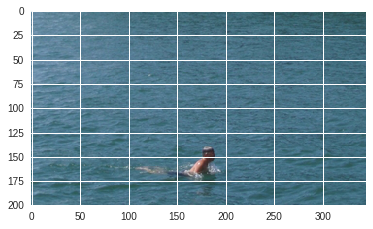

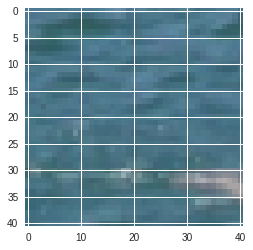

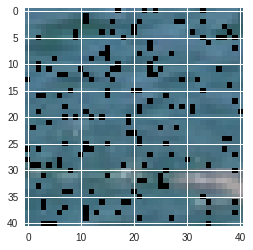

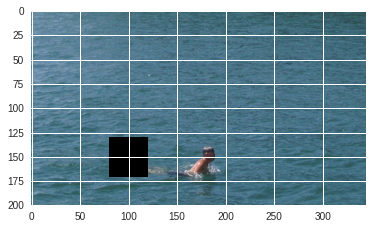

In [204]:
plt.ion()
img = read_img(IMG_FILE)
show(img)
patch = get_patch(150,100,img)
noisy = patch2X(noise_patch(patch))
show(patch)
show(noisy)
imgnew, oldpatch = remove_patch(150,100,img)
show(imgnew)


In [206]:
alphas=[]
scores=[]
for i in range(1,30) :
    print("avancement",i*100/29,"%")
    alphas.append(np.exp(-i))
    img2,score=denoise(noisy,img,np.exp(-i))
    scores.append(score)

('avancement', 3, '%')
('avancement', 6, '%')
('avancement', 10, '%')
('avancement', 13, '%')
('avancement', 17, '%')
('avancement', 20, '%')
('avancement', 24, '%')
('avancement', 27, '%')
('avancement', 31, '%')
('avancement', 34, '%')
('avancement', 37, '%')
('avancement', 41, '%')
('avancement', 44, '%')
('avancement', 48, '%')
('avancement', 51, '%')
('avancement', 55, '%')
('avancement', 58, '%')
('avancement', 62, '%')
('avancement', 65, '%')
('avancement', 68, '%')
('avancement', 72, '%')
('avancement', 75, '%')
('avancement', 79, '%')
('avancement', 82, '%')
('avancement', 86, '%')
('avancement', 89, '%')
('avancement', 93, '%')
('avancement', 96, '%')
('avancement', 100, '%')


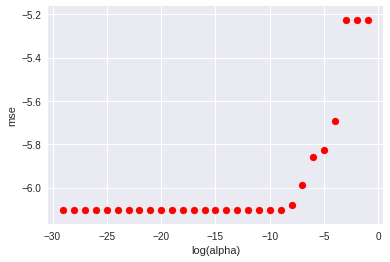

In [208]:
graph_tab=[{'x':np.log(alphas),'y':np.log(scores),'xlabel':'log(alpha)','ylabel':'mse','color':'r'}]
display_graph(graph_tab)

We observe that for alpha very high and very low, we have not a good mse. 